In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cmcrameri.cm as cmc
import cartopy.crs as ccrs
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

C:\Users\mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
data_type = "sea_level_anomaly"
# data_type = "sea_level_anomaly_filtered"

In [3]:
file_old = Path("data/data_brock_south_hemi/combined_brock_south_hemi/combined_2019_08.nc")
file_new = Path("data/data_brock_south_hemi_new/combined_brock_south_hemi_new/combined_2019_08.nc")

data_old = xr.open_dataset(file_old)
data_new = xr.open_dataset(file_new)

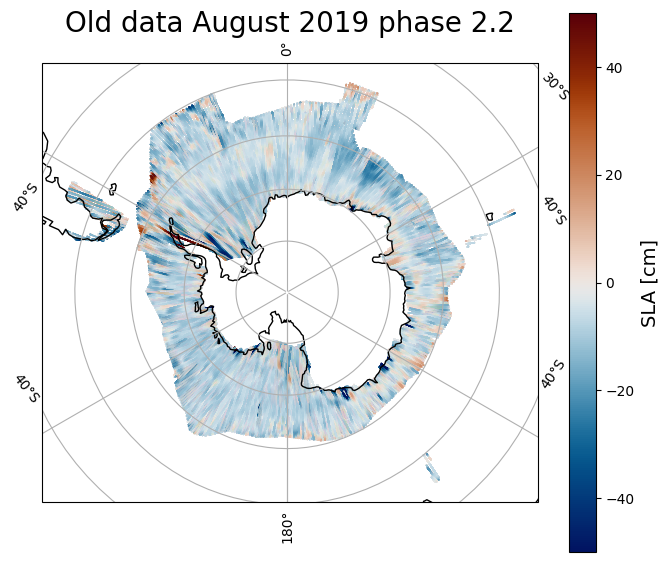

In [4]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(data_old.longitude, data_old.latitude, c=data_old[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Old data August 2019 phase 2.2", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

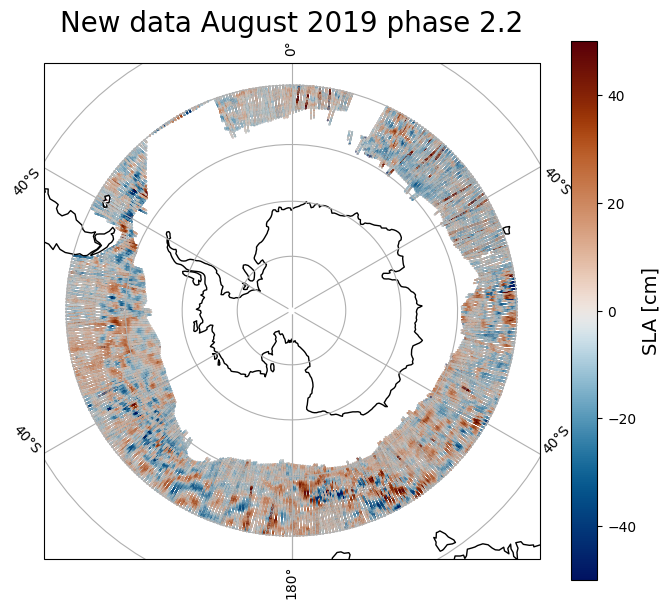

In [5]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(data_new.longitude, data_new.latitude, c=data_new[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"New data August 2019 phase 2.2", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [6]:
lat_both = xr.concat([data_old.latitude, data_new.latitude], dim="time")
lon_both = xr.concat([data_old.longitude, data_new.longitude], dim="time")
sla_both = xr.concat([data_old[data_type], data_new[data_type]], dim="time")

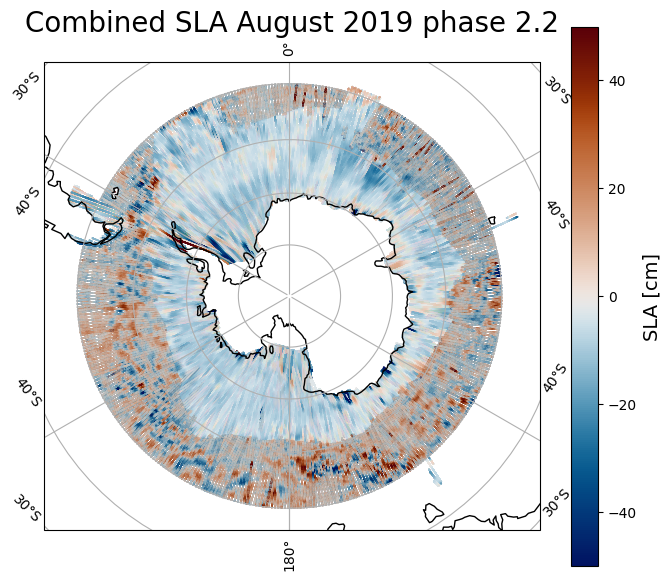

In [7]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(lon_both, lat_both, c=sla_both*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 phase 2.2", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [8]:
mean_old = data_old[data_type].mean()
mean_new = data_new[data_type].mean()
median_old = data_old[data_type].median()
median_new = data_new[data_type].median()
offset_median = median_new-median_old
offset_mean = mean_new-mean_old
new_sla_corr = data_new[data_type] - offset_median

sla_both_corr = xr.concat([data_old[data_type], new_sla_corr], dim="time")

In [9]:
print(offset_median.item())
print(offset_mean.item())

0.05954631584872264
0.06251665567651697


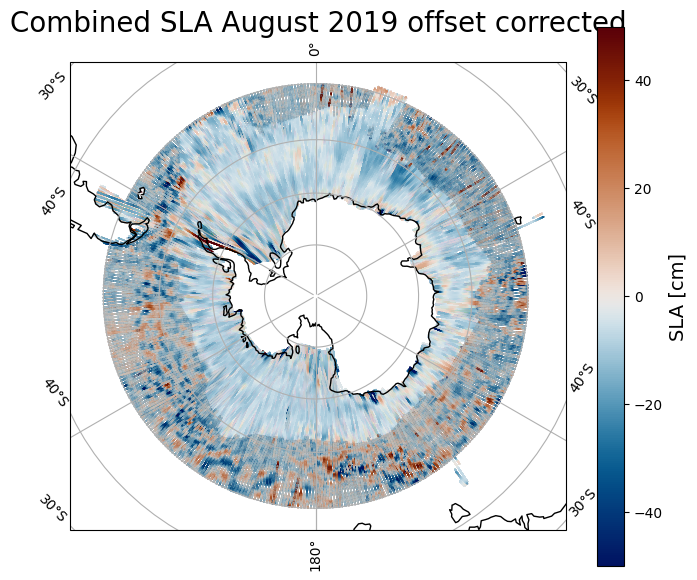

In [10]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(lon_both, lat_both, c=sla_both_corr*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 offset corrected", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [11]:
filter_idx = abs(new_sla_corr) < .75
lat_filtered = xr.concat([data_old.latitude, data_new.latitude[filter_idx]], dim="time")
lon_filtered = xr.concat([data_old.longitude, data_new.longitude[filter_idx]], dim="time")

new_sla_filtered = new_sla_corr[filter_idx]
sla_both_filtered = xr.concat([data_old[data_type], new_sla_filtered], dim="time")

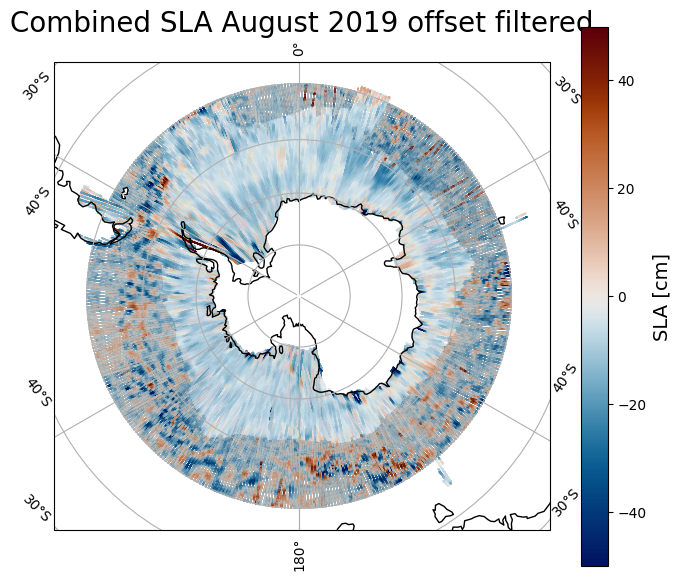

In [12]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(lon_filtered, lat_filtered, c=sla_both_filtered*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 offset filtered", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [13]:
border_sla_old_temp, border_lat_old_temp, border_lon_old_temp  = [], [], []
lon_old=data_old.longitude.values
lat_old=data_old.latitude.values
sla_old = data_old[data_type]
for i in tqdm(range(1,len(data_old[data_type]))):
    loni=lon_old[i]
    lonim=lon_old[i-1]
    lati=lat_old[i]
    latim=lat_old[i-1]
    if (loni-lonim > 0.1) | (lati-latim > 0.1):
        border_sla_old_temp.append(sla_old[i])
        border_sla_old_temp.append(sla_old[i-1])
        border_lat_old_temp.append(lati)
        border_lon_old_temp.append(loni)
        border_lat_old_temp.append(latim)
        border_lon_old_temp.append(lonim)

100%|██████████| 4843711/4843711 [00:04<00:00, 998360.51it/s] 


In [14]:
border_lat_old, border_lon_old, border_sla_old = [], [], []
for i in range(len(border_sla_old_temp)):
    if border_lat_old_temp[i] > -66:
        border_lat_old.append(border_lat_old_temp[i])
        border_lon_old.append(border_lon_old_temp[i])
        border_sla_old.append(border_sla_old_temp[i])

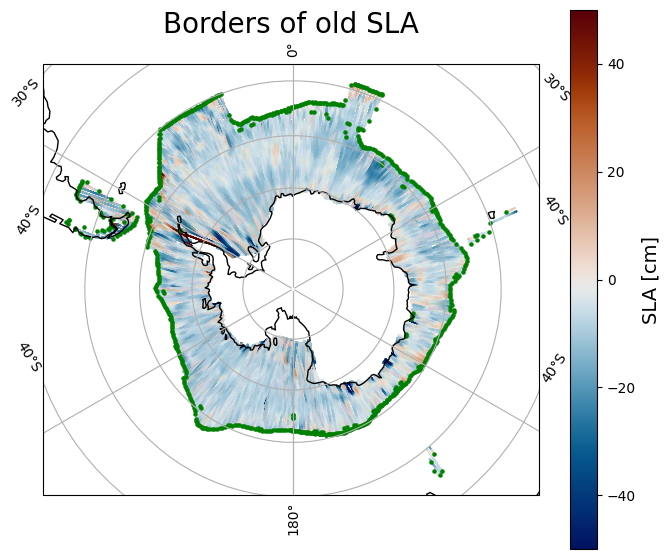

In [15]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(data_old.longitude, data_old.latitude, c=data_old[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.scatter(border_lon_old, border_lat_old, c="g", s=5, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Borders of old SLA", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [16]:
border_sla_new_temp, border_lat_new_temp, border_lon_new_temp  = [], [], []
lon_new=data_new.longitude.values
lat_new=data_new.latitude.values
sla_new = data_new[data_type]
for i in tqdm(range(1,len(data_new[data_type]))):
    loni=lon_new[i]
    lonim=lon_new[i-1]
    lati=lat_new[i]
    latim=lat_new[i-1]
    if (loni-lonim > 0.1) | (lati-latim > 0.1):
        border_sla_new_temp.append(sla_new[i])
        border_sla_new_temp.append(sla_new[i-1])
        border_lat_new_temp.append(lati)
        border_lon_new_temp.append(loni)
        border_lat_new_temp.append(latim)
        border_lon_new_temp.append(lonim)

100%|██████████| 2745144/2745144 [00:03<00:00, 873524.90it/s]


In [17]:
border_lat_new, border_lon_new, border_sla_new = [], [], []
for i in range(len(border_sla_new_temp)):
    if border_lat_new_temp[i] < -50.1:
        border_lat_new.append(border_lat_new_temp[i])
        border_lon_new.append(border_lon_new_temp[i])
        border_sla_new.append(border_sla_new_temp[i])

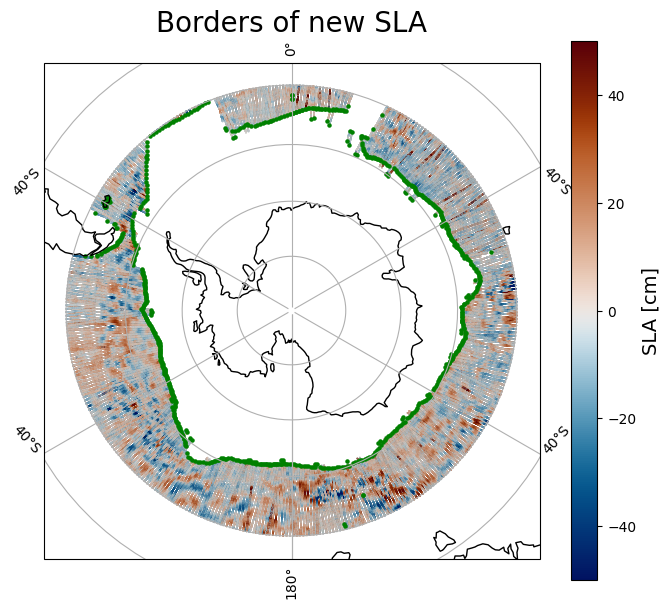

In [18]:
fig = plt.figure(figsize=(8,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(data_new.longitude, data_new.latitude, c=data_new[data_type]*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.scatter(border_lon_new, border_lat_new, c="g", s=5, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Borders of new SLA", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()

In [22]:
border_offset_median = np.nanmedian(border_sla_new)-np.nanmedian(border_sla_old)
border_offset_mean = np.nanmean(border_sla_new)-np.nanmedian(border_sla_old)
border_sla_new_corr = data_new[data_type] - border_offset_median
sla_both_border_corr = xr.concat([data_old[data_type], border_sla_new_corr], dim="time")

In [23]:
print(border_offset_median)
print(border_offset_mean)

0.04751593446057001
0.04578365389723468


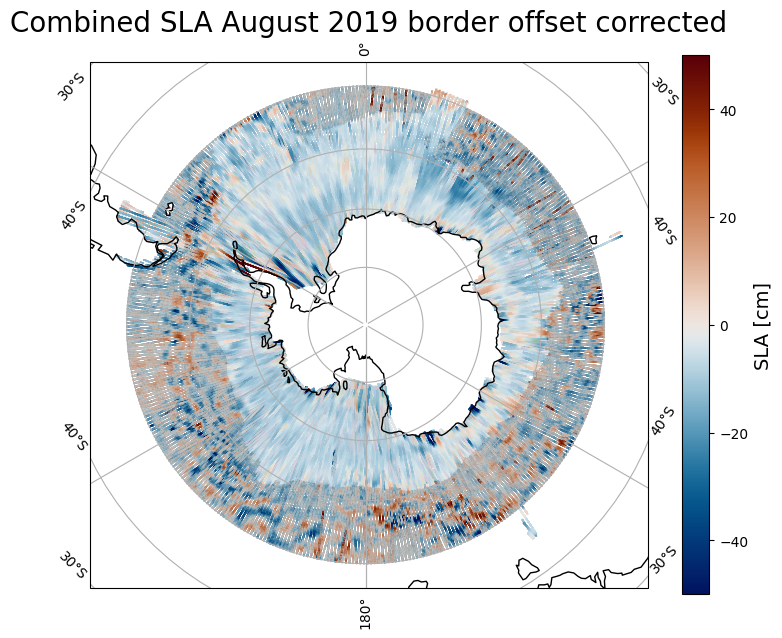

In [24]:
fig = plt.figure(figsize=(9,7), dpi=100)
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
im = ax.scatter(lon_both, lat_both, c=sla_both_border_corr*100, s=0.005, alpha=0.3, cmap=cmc.vik, transform=ccrs.Geodetic(), vmin=-50, vmax=50)
ax.coastlines()
cbar = fig.colorbar(im)
cbar.set_label("SLA [cm]", fontsize=14)
cbar.solids.set(alpha=1)
ax.set_title(f"Combined SLA August 2019 border offset corrected", fontsize=20)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
plt.show()